In [85]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
from scipy import integrate
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score
import matplotlib

In [86]:
def ReadFile_mean(file,cut1,cut2) :
    rf = pd.read_csv(str(file), delim_whitespace=True, names=['us1','us2','us3','Lag'],skiprows=100)
    return(float(rf.Lag[cut1:cut2].mean()))
def ReadFile_error(file,cut1,cut2) :
    rf = pd.read_csv(str(file), delim_whitespace=True, names=['us1','us2','us3','Lag'],skiprows=100)
    plt.plot(rf.Lag)
    plt.savefig(str(file)+'.pdf')
    plt.close()
    return(float(rf.Lag[cut1:cut2].sem())*627.51)
def ReadFile_DF(file):
    return(pd.read_csv(file, delim_whitespace=True, names=["DisAngs",'Files','AvLag','Error','DF'],skiprows=1))
    
def Data_treatment(path,cut1,cut2,FileName,order):
    Dic = {'Files': [i for i in os.listdir(path) if (i.startswith('CV')) & ('.pdf' not in str(i))]}
    df = pd.DataFrame(Dic) ; df['Files'].sort_index()
    dis = [float(i[2:]) for i in df.Files] ; dis.sort()
    df['DisBohr'] = dis ; df.drop(columns='Files', inplace=True)
    df['DisAngs'] = [i/1.89 for i in df.DisBohr]
    df['Files'] = ['CV'+str(i) for i in df.DisBohr]
    df['AvLag'] = [ReadFile_mean(path+i,cut1,cut2) for i in df.Files] # This line often yields issues due to the filename that is shorted when considering distances ; I don't know how to fix it technically except changing the file name...
    df['Error'] = [ReadFile_error(path+i,cut1,cut2) for i in df.Files]
    df.drop(columns=['DisBohr'], inplace=True)
    if order == 'direct':
        df['DF'] = np.round(- integrate.cumtrapz(pd.to_numeric(df.AvLag[:]), pd.to_numeric(df.DisAngs[:]) , initial=0)*627.51, 1)
    if order == 'indirect':
        df['DF'] = np.round(- integrate.cumtrapz(pd.to_numeric(df.AvLag[::-1]), pd.to_numeric(df.DisAngs[::-1]) , initial=0)*627.51, 1)
    df.to_csv(str(os.getcwd())+'/'+FileName+'.dat', sep=' ')
    return(df)


In [87]:
path_ZnMe2 = "/Volumes/VERBATIM HD/3_Save_Mai2023/Salt_effects/Zn_to_Mg_Transmetallation/Bluemoon/Jordan_system/Dimer_ZnMg_THF/ZnMe2_MgCl2/BM/RECAP/LAG/"
Data_treatment(path_ZnMe2,0, None,'ZnMe2_MgCl2','direct') 

,DisAngs,Files,AvLag,Error,DF
0,1.912650,CV3.614908,0.062915,0.072662,-0.0
1,2.006708,CV3.792678,0.041727,0.063540,-3.1
2,2.215205,CV4.186737,0.018850,0.067403,-7.1
3,2.483104,CV4.693066,0.003065,0.097138,-8.9
4,2.657687,CV5.023028,0.005889,0.087741,-9.4
5,2.822395,CV5.334326,0.007242,0.059041,-10.1
6,3.006363,CV5.682026,0.006078,0.061607,-10.8
7,3.256887,CV6.155516,0.006599,0.073901,-11.8
8,3.501863,CV6.618522,0.005345,0.074104,-12.7
9,4.056069,CV7.66597,0.001571,0.094604,-13.9


In [97]:
path_ZnMeCl = "/Volumes/VERBATIM HD/3_Save_Mai2023/Salt_effects/Zn_to_Mg_Transmetallation/Bluemoon/Jordan_system/Dimer_ZnMg_THF/ZnMeCl_MgMeCl/BM/RECAP/LAG/"
Data_treatment(path_ZnMeCl,100,20000,'ZnMeCl_MgMeCl_20000','direct') 

,DisAngs,Files,AvLag,Error,DF
0,2.271793,CV4.293688,-0.036705,0.082587,-0.0
1,2.490085,CV4.70626,-0.039921,0.070926,5.2
2,2.726211,CV5.152538,-0.002621,0.098668,8.4
3,2.986096,CV5.643721,-0.002739,0.097623,8.8
4,3.256698,CV6.155159,-0.002930,0.085041,9.3
5,3.505924,CV6.626196,-0.000954,0.114941,9.6
6,3.753245,CV7.093633,-0.001295,0.088300,9.8
7,3.996659,CV7.553685,-0.002290,0.122903,10.1
8,4.516769,CV8.536693,0.000497,0.116636,10.4
9,5.010597,CV9.470028,0.001237,0.117121,10.1


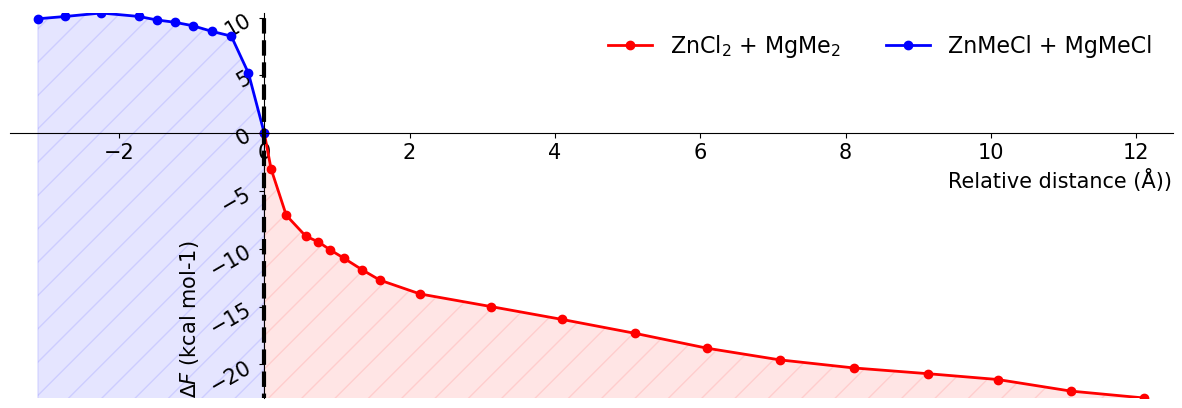

In [98]:
df1 = ReadFile_DF("ZnMe2_MgCl2.dat") ; df2 = ReadFile_DF("ZnMeCl_MgMeCl.dat")

plt.figure(figsize=[15,5])
for pos in ['right', 'top']: plt.gca().spines[pos].set_visible(False)

df1x = df1.DisAngs-min(df1.DisAngs) ; df1y = df1.DF
plt.plot(df1x, df1y, color = 'red', label='ZnCl$_{2}$ + MgMe$_{2}$', marker='o', linewidth=2)
plt.fill_between(df1x, df1y,-100, color='red', alpha=0.1, hatch="/")
#plt.errorbar(df1x, df1y,yerr=df1.Error,capsize=10, color='red')

df2x = -df2.DisAngs+min(df2.DisAngs) ; df2y = df2.DF
plt.plot(df2x, df2y, color = 'blue', label='ZnMeCl + MgMeCl', marker='o', linewidth=2)
plt.fill_between(df2x, df2y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

plt.vlines(0,ymin=-100,ymax=100, color='black', linewidth=3, linestyles='dashed')

axe=plt.gca() ; 
axe.spines['bottom'].set_position('zero')
axe.spines['left'].set_position('zero')

plt.legend(fontsize=16, ncol=2,frameon=False)
plt.xticks(size=15) ; plt.yticks(size=15, rotation=30)
plt.xlabel("Relative distance (Å))", size=15,loc='right') ; plt.ylabel('∆${F}$ (kcal mol-1)', size=15,loc='bottom',rotation=90)
plt.ylim(min(df1.DF),max(df2.DF)) ; plt.xlim(-3.5,12.5)
plt.savefig('profile_ZnMe2_MgCl2_THF.pdf')


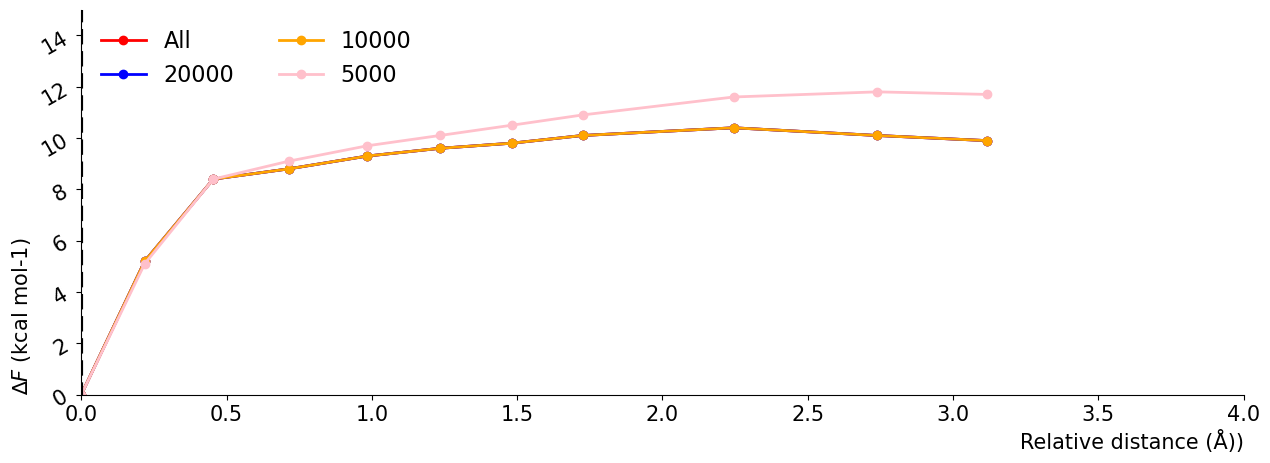

In [112]:
df1 = ReadFile_DF("ZnMeCl_MgMeCl.dat") ; df2 = ReadFile_DF("ZnMeCl_MgMeCl_20000.dat")
df3 = ReadFile_DF("ZnMeCl_MgMeCl_10000.dat")
df4 = ReadFile_DF("ZnMeCl_MgMeCl_5000.dat")

plt.figure(figsize=[15,5])
for pos in ['right', 'top']: plt.gca().spines[pos].set_visible(False)

df1x = df1.DisAngs-min(df1.DisAngs) ; df1y = df1.DF
plt.plot(df1x, df1y, color = 'red', label='All', marker='o', linewidth=2)
#plt.fill_between(df1x, df1y,-100, color='red', alpha=0.1, hatch="/")
#plt.errorbar(df1x, df1y,yerr=df1.Error,capsize=10, color='red')

df2x = df2.DisAngs-min(df2.DisAngs) ; df2y = df2.DF
plt.plot(df2x, df2y, color = 'blue', label='20000', marker='o', linewidth=2)
#plt.fill_between(df2x, df2y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

df3x = df3.DisAngs-min(df3.DisAngs) ; df3y = df3.DF
plt.plot(df3x, df3y, color = 'orange', label='10000', marker='o', linewidth=2)
#plt.fill_between(df3x, df3y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

df4x = df4.DisAngs-min(df4.DisAngs) ; df4y = df4.DF
plt.plot(df4x, df4y, color = 'pink', label='5000', marker='o', linewidth=2)
#plt.fill_between(df4x, df4y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

plt.vlines(0,ymin=-100,ymax=100, color='black', linewidth=3, linestyles='dashed')
axe=plt.gca() ; 
axe.spines['bottom'].set_position('zero')
axe.spines['left'].set_position('zero')

plt.legend(fontsize=16, ncol=2,frameon=False)
plt.xticks(size=15) ; plt.yticks(size=15, rotation=30)
plt.xlabel("Relative distance (Å))", size=15,loc='right') ; plt.ylabel('∆${F}$ (kcal mol-1)', size=15,loc='bottom',rotation=90)
#plt.ylim(-40,0) ; plt.xlim(-3.5,12.5)
plt.ylim(0,15) ; plt.xlim(0,4)

plt.savefig('profile_ZnMe2_MgCl2_THF.pdf')


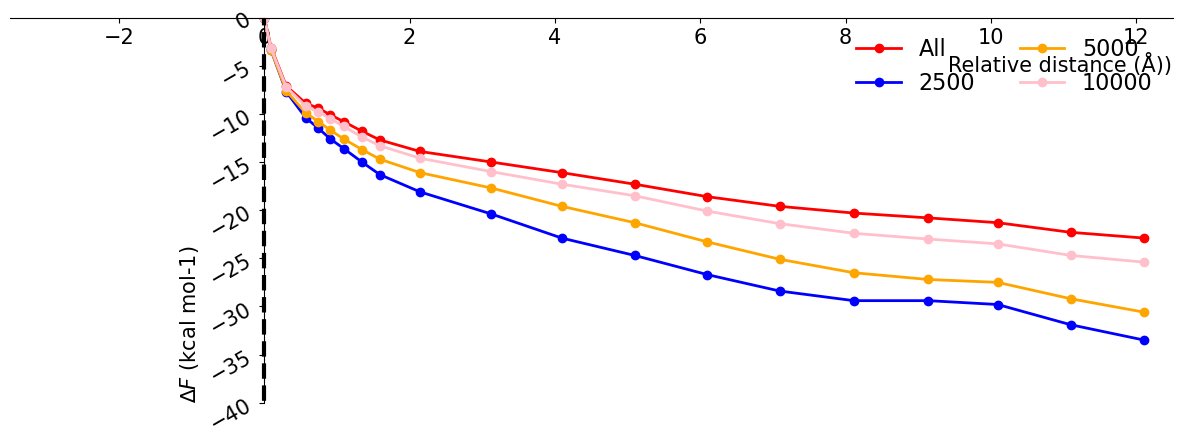

In [117]:
df1 = ReadFile_DF("ZnMe2_MgCl2.dat") ; 
df2 = ReadFile_DF("ZnMe2_MgCl2_2500.dat")
df3 = ReadFile_DF("ZnMe2_MgCl2_5000.dat")
df4 = ReadFile_DF("ZnMe2_MgCl2_10000.dat")

plt.figure(figsize=[15,5])
for pos in ['right', 'top']: plt.gca().spines[pos].set_visible(False)

df1x = df1.DisAngs-min(df1.DisAngs) ; df1y = df1.DF
plt.plot(df1x, df1y, color = 'red', label='All', marker='o', linewidth=2)
#plt.fill_between(df1x, df1y,-100, color='red', alpha=0.1, hatch="/")
#plt.errorbar(df1x, df1y,yerr=df1.Error,capsize=10, color='red')

df2x = df2.DisAngs-min(df2.DisAngs) ; df2y = df2.DF
plt.plot(df2x, df2y, color = 'blue', label='2500', marker='o', linewidth=2)
#plt.fill_between(df2x, df2y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

df3x = df3.DisAngs-min(df3.DisAngs) ; df3y = df3.DF
plt.plot(df3x, df3y, color = 'orange', label='5000', marker='o', linewidth=2)
#plt.fill_between(df3x, df3y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

df4x = df4.DisAngs-min(df4.DisAngs) ; df4y = df4.DF
plt.plot(df4x, df4y, color = 'pink', label='10000', marker='o', linewidth=2)
#plt.fill_between(df4x, df4y,-100, color='blue', alpha=0.1, hatch="/")
#plt.errorbar(df2x, df2y,yerr=df2.Error,capsize=10, color='blue')

plt.vlines(0,ymin=-100,ymax=100, color='black', linewidth=3, linestyles='dashed')
axe=plt.gca() ; 
axe.spines['bottom'].set_position('zero')
axe.spines['left'].set_position('zero')

plt.legend(fontsize=16, ncol=2,frameon=False)
plt.xticks(size=15) ; plt.yticks(size=15, rotation=30)
plt.xlabel("Relative distance (Å))", size=15,loc='right') ; plt.ylabel('∆${F}$ (kcal mol-1)', size=15,loc='bottom',rotation=90)
plt.ylim(-40,0) ; plt.xlim(-3.5,12.5)
#plt.ylim(0,15) ; plt.xlim(0,4)

plt.savefig('profile_ZnMe2_MgCl2_THF.pdf')
